<a href="https://colab.research.google.com/github/sonhs99/MachineLearning/blob/master/Assignment06/Assignment06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Assignment04
---

In [2]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving data-nonlinear.txt to data-nonlinear.txt
User uploaded file "data-nonlinear.txt" with length 2233 bytes


In [0]:
import numpy as np
import matplotlib.pyplot as plt

data    = np.genfromtxt("data-nonlinear.txt", delimiter=',')

pointX  = data[:, 0]
pointY  = data[:, 1]
label   = data[:, 2]

pointX0 = pointX[label == 0]
pointY0 = pointY[label == 0]

pointX1 = pointX[label == 1]
pointY1 = pointY[label == 1]

In [0]:
def sigmoid(x):
  return np.reciprocal(1 + np.exp(-x))

def energy(theta, data, label):
  temp = sigmoid(data@theta)
  return -(label*np.log(temp) + (1 - label)*np.log(1 - temp)).mean()

def generate(x, y):
  return np.array([np.full(x.shape, 1), x, y, x*y, x**2, y**2])

def accuracy(data, theta, label):
  pred = sigmoid(data@theta)
  right = 0
  for p, l in zip(pred, label):
    if (p > 0.5 and l == 1) or (p < 0.5 and l == 0): right += 1
  return right / len(data)

In [0]:
theta = [np.ones(6)]
e = [0]
x, y = pointX, pointY
n_data = generate(x, y).transpose()
tmp = energy(theta[-1], n_data, label)
alpha = 0.002

while tmp != e[-1]:
  e.append(tmp)
  theta.append(theta[-1].copy())

  temp = sigmoid(n_data@theta[-1]) - label
  temp2 = n_data.transpose()@temp 
  theta[-1] -= alpha*temp2/len(n_data)
  tmp = energy(theta[-1], n_data, label)

In [0]:
acc = []
for t in theta: acc.append(accuracy(n_data, t, label))

1. Plot the training data

In [0]:
plt.figure()
plt.scatter(pointX0, pointY0, c='b')
plt.scatter(pointX1, pointY1, c='r')
plt.tight_layout()
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

2. Write down the high dimensional function $g(x, y; \theta)$

* $g(x, y; \theta) = \theta_0 + x\theta_1 + y\theta_2 + xy\theta_3 + x^2\theta_4  
y^2\theta_5$

3. Plotting the training error

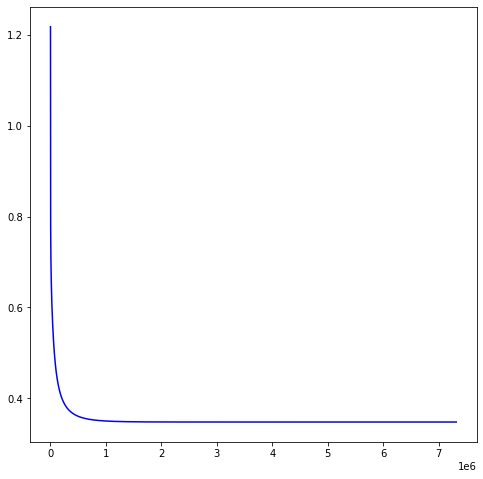

In [0]:
plt.figure(figsize=(8, 8))
plt.plot(range(1, len(e)), e[1:], c='b')
plt.show()

4. Plotting the training accuracy

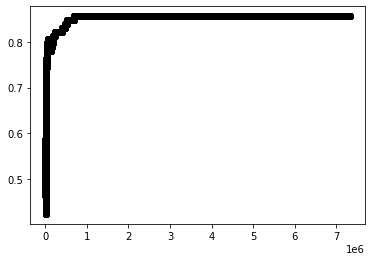

In [0]:
plt.scatter(range(0, len(acc)), acc, c='k')
plt.show()

In [0]:
5. 

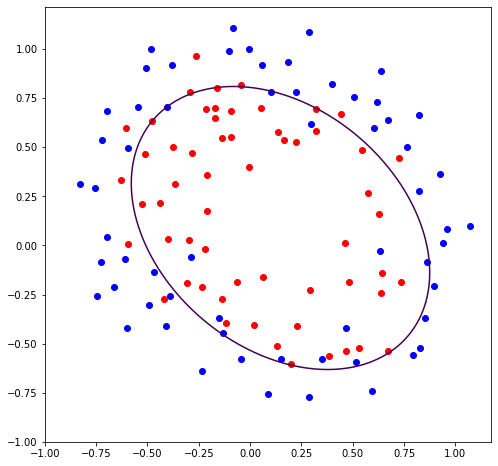

In [0]:
p_x, p_y = np.meshgrid(np.linspace(-1.0, 1.0, 400), np.linspace(-1.0, 1.0, 400))
p_z = sigmoid(generate(p_x, p_y).transpose()@theta[-1])
plt.figure(figsize=(8, 8))
plt.contour(p_x, p_y, p_z, levels = [0.5])
plt.scatter(pointX0, pointY0, c='b')
plt.scatter(pointX1, pointY1, c='r')
plt.show()

In [0]:
print(accuracy(n_data, theta[-1], label))

0.8559322033898306
